In [5]:
import sys
import os
from importlib import reload
import numpy as np
import pylab as pl

sys.path.insert(0, '../src')
import deepleeo.dataset.preprocessor as prep
import deepleeo.utils.geofunctions as gf
import deepleeo.utils.filesystem as fs
from deepleeo.utils import image

reload(prep)
reload(gf)
reload(fs)
reload(image)

%matplotlib inline

In [ ]:
DATA_DIR = "../data_real"
#raster_file = os.path.join(DATA_DIR, "Landsat8_225-64_17-07-2016-R6G5B4.tif")
raster_file = os.path.join(DATA_DIR, "Landsat8_225-64_17-07-2016-B1-7.tif")
vector_shp = os.path.join(DATA_DIR, "PRODES2016_225-64_REP.shp")
output_dir = os.path.join(DATA_DIR, "generated")
fs.mkdir(output_dir)
class_column = "agregClass"

In [ ]:
preproc = prep.Preprocessor(raster_file, vector_shp)

result = preproc.compute_indexes({
    "ndvi": {
        "idx_b_red": 3,
        "idx_b_nir": 4
    },
    "evi": {
        "idx_b_blue":1,
        "idx_b_red": 3,
        "idx_b_nir": 4,
        "factor": 0.0001
    },
    "evi2": {
        "idx_b_red": 3,
        "idx_b_nir": 4
    }
})
print(result.shape)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa7bcbbee40> >
(7741, 7591)
(7741, 7591)
(7741, 7591)
(7741, 7591)
(7741, 7591)
(7741, 7591)
(7741, 7591)


(-0.5, 7590.5, 7740.5, -0.5)

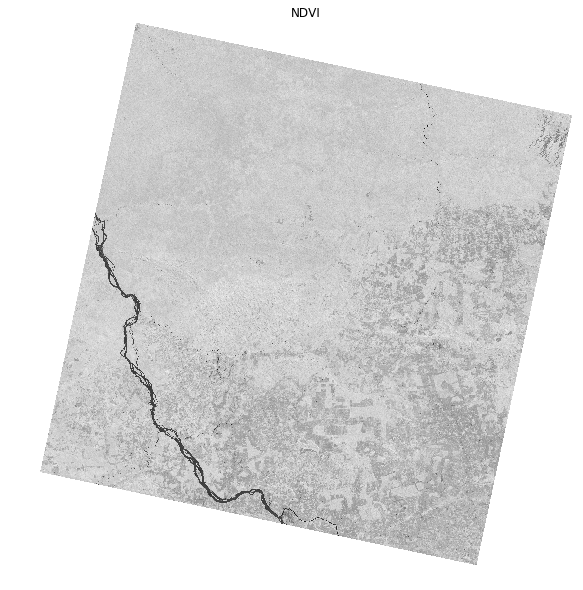

In [51]:
pl.figure(figsize=(10,10))
pl.title('NDVI')
#raster_img = skimage.img_as_float(raster_img).astype(np.float32)
ndvi = preproc.get_index_band("ndvi")
#preproc.save_index_raster("ndvi", os.path.join(output_dir, "ndvi.tiff"))
pl.imshow(ndvi, cmap="gray")
pl.axis('off')

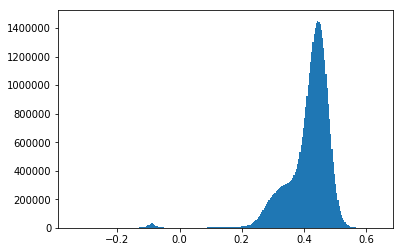

In [52]:
hist_ndvi = pl.hist(ndvi.ravel(), bins=256)

(-0.5, 7590.5, 7740.5, -0.5)

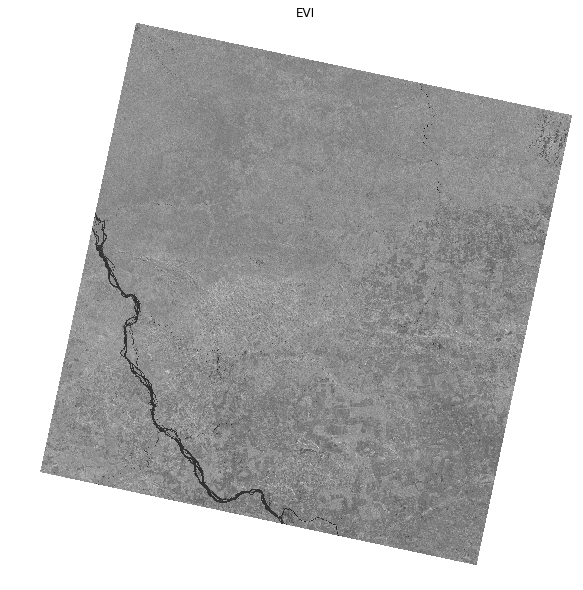

In [53]:
pl.figure(figsize=(10,10))
pl.title('EVI')
evi = preproc.get_index_band("evi")
#preproc.save_index_raster("evi", os.path.join(output_dir, "evi.tiff"))
pl.imshow(evi, cmap="gray")
pl.axis('off')

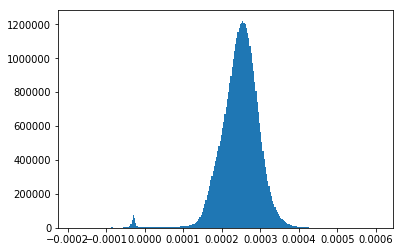

In [54]:
hist_evi = pl.hist(evi.ravel(), bins=256)

(-0.5, 7590.5, 7740.5, -0.5)

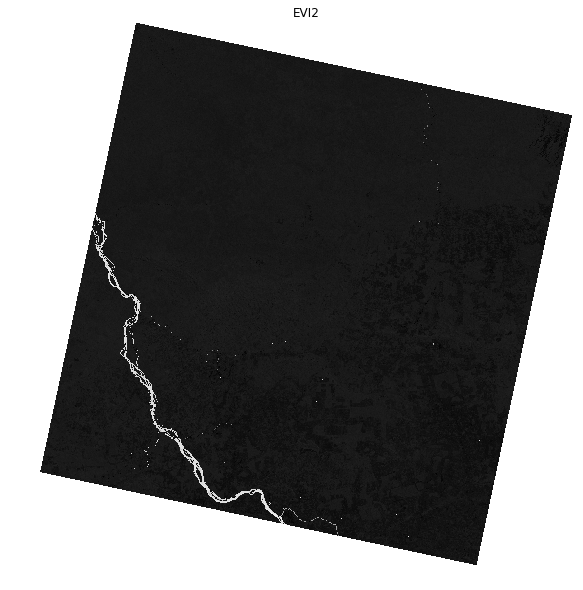

In [61]:
pl.figure(figsize=(10,10))
pl.title('EVI2')
evi2 = preproc.get_index_band("evi2")
#preproc.save_index_raster("evi2", os.path.join(output_dir, "evi2.tiff"))
pl.imshow(evi2, cmap="gray")
pl.axis('off')

[-0.0001848342154061995 -0.00018242072512203244 -0.00018003495662494745
 ... 0.0005996865861419483 0.0006052789916950893 --]


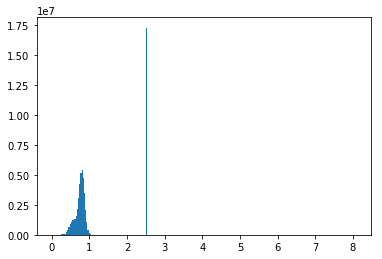

In [62]:
hist_evi2 = pl.hist(evi2.ravel(), bins=256)
print(np.unique(evi))

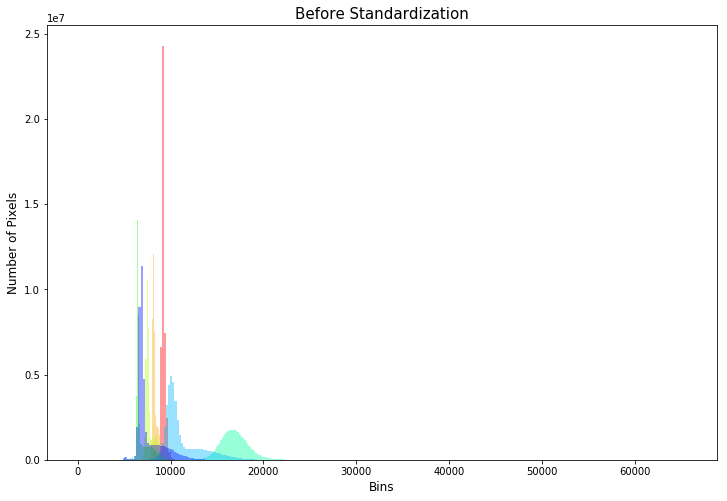

In [59]:
#print(np.unique(evi))
raster_ = preproc.get_raster_stacked_raster()
image.plot_image_histogram(raster_, title = "Before Standardization")

In [63]:
raster = preproc.standardize_image()

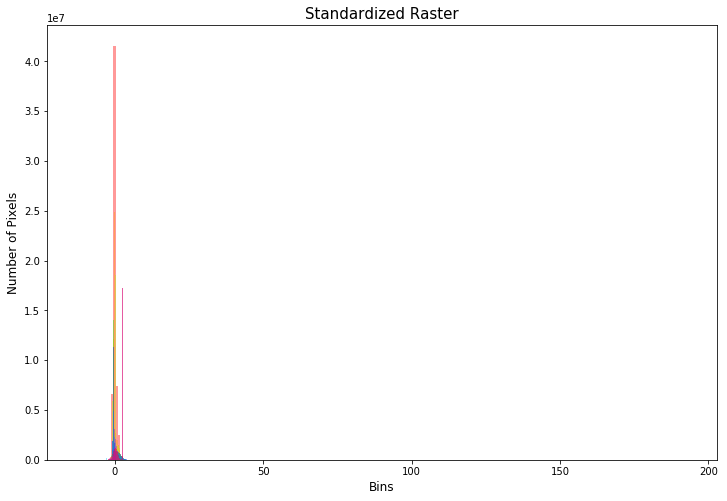

In [64]:
image.plot_image_histogram(raster, title="Standardized Raster")

In [13]:
#preproc.save_stacked_raster(os.path.join(output_dir, "new_raster.tiff"))